### **Visualizing data for checking any relationship between the crashes in the past and in recent years.**

In [2]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
# Extracting and reading the dataset
airline_data = pd.read_csv("C:\\Users\\23mim\\Datasets\\Airline Safety\\airline-safety.csv")

#### **Brief Overview of the dataset**

In [4]:
# First few rows of the dataset
airline_data.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


**Available Seat Kilometers (ASK)** or **Available Seat Miles (ASM)** captures the total flight passenger capacity of an airline in kilometers (or in miles). It is obtained by multiplying the total number of seats available for scheduled passengers and the total number of kilometers in which those seats were flown.

A seat-kilometer is available when a seat that is available for carrying a passenger is flown one kilometer. Seats that are not usable for various reasons are excluded.

In [5]:
# Info about the dataset
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [6]:
# Summary of the dataset (descriptive stats)
airline_data.describe().T

,count,mean,std,min,25%,50%,75%,max
avail_seat_km_per_week,56.0,1.384621e+09,1.465317e+09,259373346.0,4.740362e+08,802908893.0,1.847239e+09,7.139291e+09
incidents_85_99,56.0,7.178571e+00,1.103566e+01,0.0,2.000000e+00,4.0,8.000000e+00,7.600000e+01
fatal_accidents_85_99,56.0,2.178571e+00,2.861069e+00,0.0,0.000000e+00,1.0,3.000000e+00,1.400000e+01
fatalities_85_99,56.0,1.124107e+02,1.466911e+02,0.0,0.000000e+00,48.5,1.842500e+02,5.350000e+02
incidents_00_14,56.0,4.125000e+00,4.544977e+00,0.0,1.000000e+00,3.0,5.250000e+00,2.400000e+01
fatal_accidents_00_14,56.0,6.607143e-01,8.586837e-01,0.0,0.000000e+00,0.0,1.000000e+00,3.000000e+00
fatalities_00_14,56.0,5.551786e+01,1.113328e+02,0.0,0.000000e+00,0.0,8.325000e+01,5.370000e+02


In [7]:
# Checking for null values in the dataset
airline_data.isnull().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

**Exploratory Data Analysis**

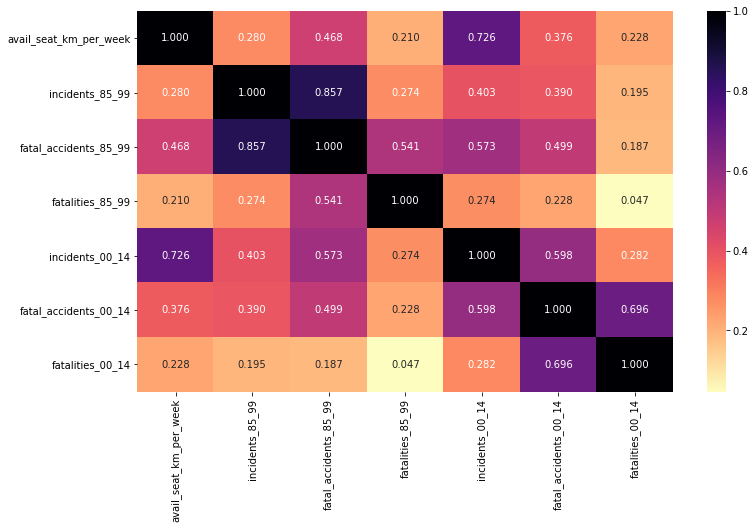

In [8]:
# Heatmap of Correlation between the features of the dataset
plt.figure(figsize=(12, 7))
sns.heatmap(data=airline_data.corr(), annot=True, fmt='.3f', cmap='magma_r')
plt.yticks(rotation=0);

We can see moderate to high correlation between some variables.

1. **incidents_00_14** and **avail_seat_km_per_week** (+0.726)
2. **incidents_85_99** and **fatal_accidents_85_99** (+0.857)
3. **incidents_00_14** and **fatal_accidents_00_14** (+0.598)
4. **fatal_accidents_85_99** and **fatalities_85_99** (+0.541)
5. **fatal_accidents_00_14** and **fatalities_00_14** (+0.696)

We can conclude some reasonable arguments for the above correlations:

1--> An airline with high ASK per week is likely to have more incidents than an airline with lower ASK per week.

2 and 3--> An airline having more incidents is likely have more fatal accidents in the same time period. However, we can see a dip in the correlation for the recent years.

4 and 5--> An airline having more fatal accidents is likely to have more fatalities. Also, in the recent years, a fatal accident is more likely to result in a fatality.

In [9]:
# Total incidents for both time intervals
print("#Total incidents (1985-1999) =", airline_data['incidents_85_99'].sum())
print("#Total incidents (2000-2014) =", airline_data['incidents_00_14'].sum())
print("Percentage change in the #incidents: {:.2f}%".format(100*(airline_data['incidents_00_14'].sum() - airline_data['incidents_85_99'].sum())/ airline_data['incidents_85_99'].sum()))

#Total incidents (1985-1999) = 402
#Total incidents (2000-2014) = 231
Percentage change in the #incidents: -42.54%


We can see that the **total number of incidents** reported by airlines have **decreased by 42.54%** druing the time period 2000-2014 from 1985-1999.

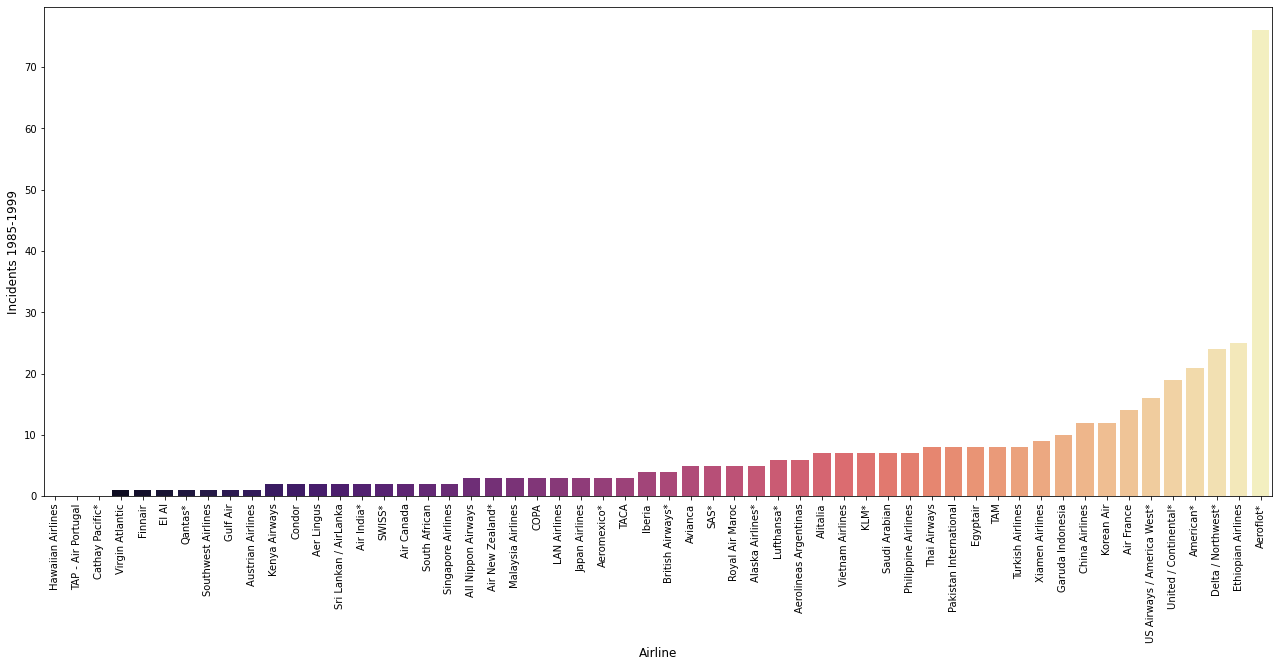

In [10]:
# Barplot of the incidents per airlines (1985-1999)
plt.figure(figsize=(22, 9))
sns.barplot(data=airline_data, y="incidents_85_99", x="airline", palette='magma', order=airline_data.sort_values(by='incidents_85_99')['airline'])
plt.xticks(rotation=90)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Incidents 1985-1999', fontsize=12);

In [11]:
# Top 5 Airlines having very less or no incidents during the period 1985-1999
airline_data.sort_values(by='incidents_85_99')['airline'][:5]

26     Hawaiian Airlines
48    TAP - Air Portugal
15       Cathay Pacific*
54       Virgin Atlantic
23               Finnair
Name: airline, dtype: object

In [12]:
# Bottom 5 Airlines having very high number of incidents during the period 1985-1999
airline_data.sort_values(by='incidents_85_99')['airline'][-5:]

51    United / Continental*
11                American*
19       Delta / Northwest*
22       Ethiopian Airlines
1                 Aeroflot*
Name: airline, dtype: object

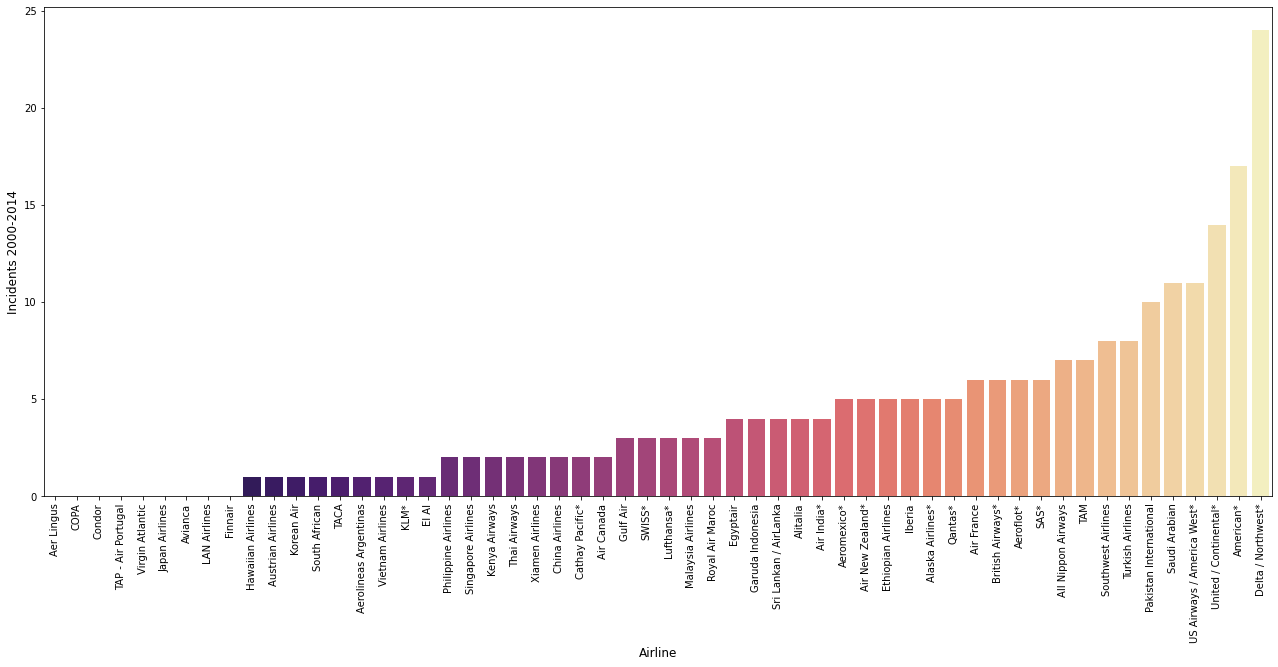

In [13]:
# Barplot of the incidents per airlines (2000-2014)
plt.figure(figsize=(22, 9))
sns.barplot(data=airline_data, y="incidents_00_14", x="airline", palette='magma', order=airline_data.sort_values(by='incidents_00_14')['airline'])
plt.xticks(rotation=90)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Incidents 2000-2014', fontsize=12);

In [14]:
# Top 5 Airlines having very less or no incidents during the period 2000-2014
airline_data.sort_values(by='incidents_00_14')['airline'][:5]

0             Aer Lingus
18                  COPA
17                Condor
48    TAP - Air Portugal
54       Virgin Atlantic
Name: airline, dtype: object

In [15]:
# Bottom 5 Airlines having very high number of incidents during the period 2000-2014
airline_data.sort_values(by='incidents_00_14')['airline'][-5:]

40                 Saudi Arabian
52    US Airways / America West*
51         United / Continental*
11                     American*
19            Delta / Northwest*
Name: airline, dtype: object

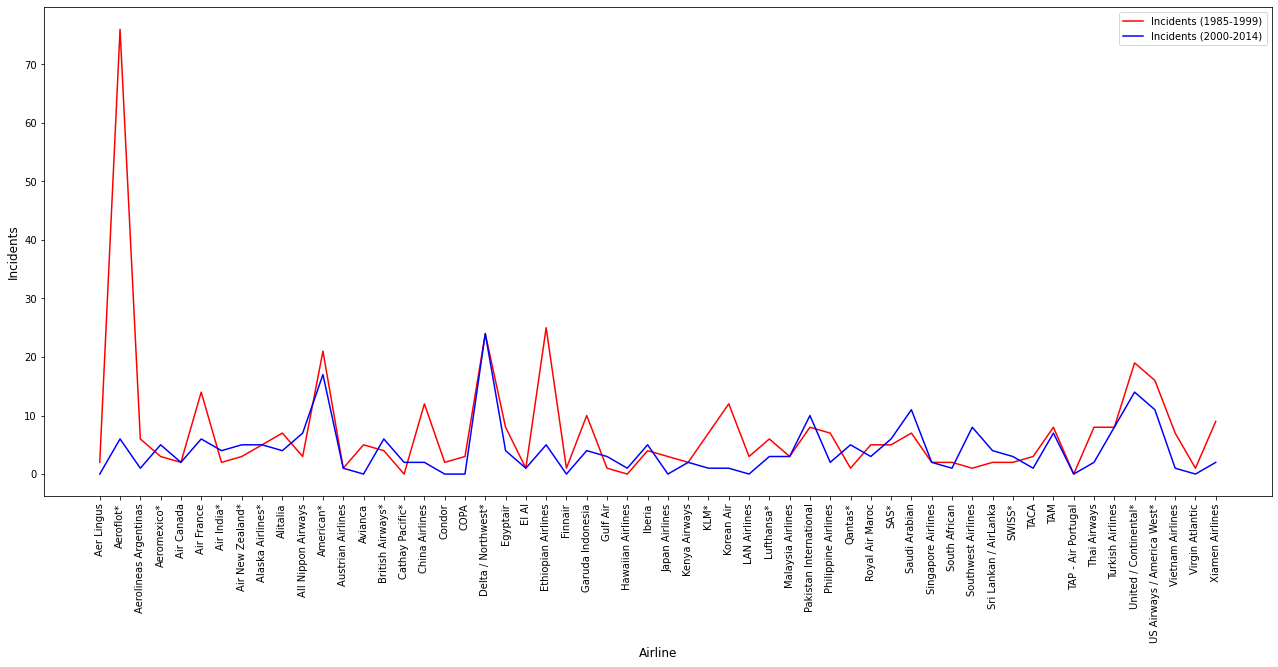

In [16]:
# Lineplots of the number of incidents of each airline in the two time intervals
plt.figure(figsize=(22, 9))
sns.lineplot(data=airline_data, x='airline', y='incidents_85_99', label='Incidents (1985-1999)', color='red')
sns.lineplot(data=airline_data, x='airline', y='incidents_00_14', label='Incidents (2000-2014)', color='blue')
plt.xticks(rotation=90)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Incidents', fontsize=12);

From the above line plots for both time period, overall we can see a lower number of incidents during the 2000-2014 period.

In [17]:
# Correlation between two time intervals of incidents 
airline_data[['incidents_85_99', 'incidents_00_14']].corr()

,incidents_85_99,incidents_00_14
incidents_85_99,1.000000,0.403009
incidents_00_14,0.403009,1.000000


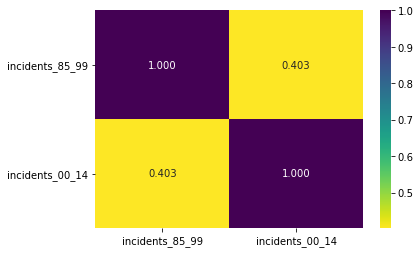

In [18]:
# Heatmap of Correlation between two time intervals of incidents
plt.figure(figsize=(6, 4))
sns.heatmap(data=airline_data[['incidents_85_99', 'incidents_00_14']].corr(), annot=True, fmt='.3f', cmap='viridis_r')
plt.yticks(rotation=0);

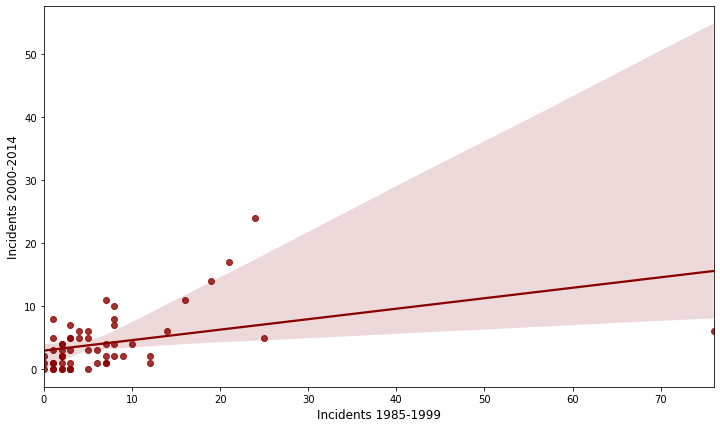

In [19]:
# Regplot between the two time intervals of incidents
plt.figure(figsize=(12, 7))
sns.regplot(data=airline_data, x='incidents_85_99', y='incidents_00_14', color='darkred')
plt.xlabel('Incidents 1985-1999', fontsize=12)
plt.ylabel('Incidents 2000-2014', fontsize=12);

We can see a slight positive correlation between the number of incidents occurred during both the periods.

In [20]:
# Total fatal accidents for both time periods
print("#Total fatal accidents (1985-1999) =", airline_data['fatal_accidents_85_99'].sum())
print("#Total fatal accidents (2000-2014) =", airline_data['fatal_accidents_00_14'].sum())
print("Percentage change in the #fatal accidents: {:.2f}%".format(100*(airline_data['fatal_accidents_00_14'].sum() - airline_data['fatal_accidents_85_99'].sum())/ airline_data['fatal_accidents_85_99'].sum()))

#Total fatal accidents (1985-1999) = 122
#Total fatal accidents (2000-2014) = 37
Percentage change in the #fatal accidents: -69.67%


We can see a **huge dip** in the **total number of fatal accidents** for airlines during the period 2000-2014 compared to the 1985-1999 period. The decrease can be seen as about **69.67% (approx. 70%)**.

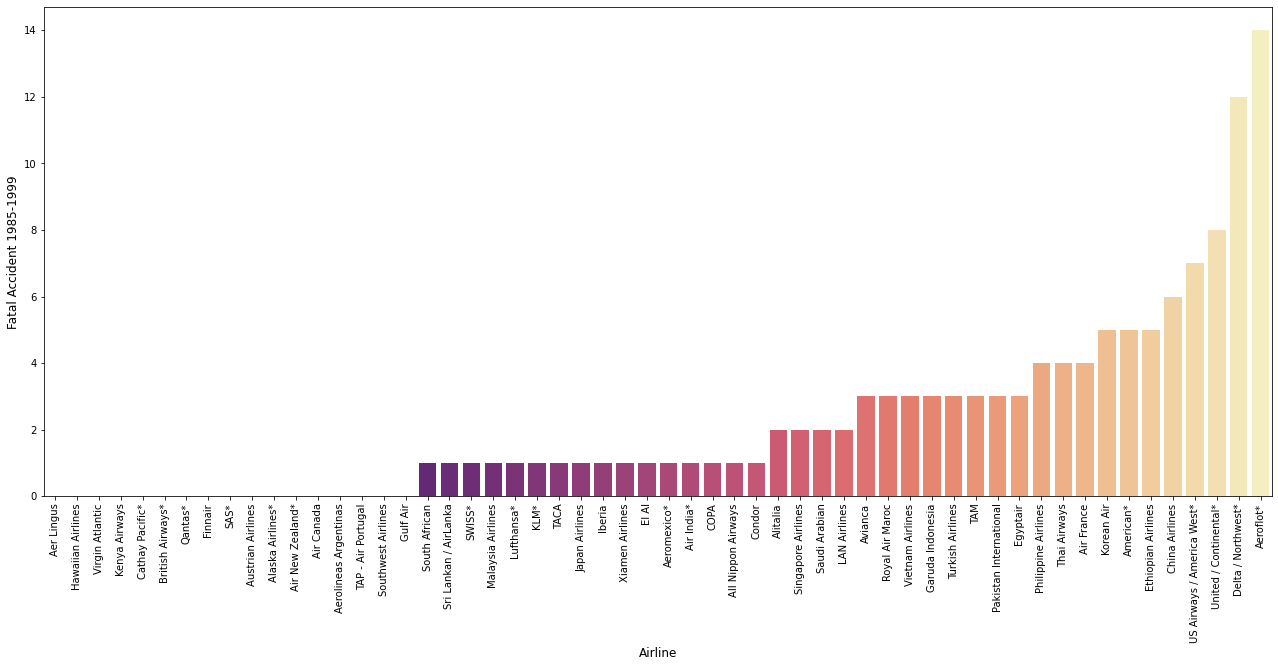

In [21]:
# Barplot of the fatal accidents of each airline (1985-1999)
plt.figure(figsize=(22, 9))
sns.barplot(data=airline_data, y="fatal_accidents_85_99", x="airline", palette='magma', order=airline_data.sort_values(by='fatal_accidents_85_99')['airline'])
plt.xticks(rotation=90)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Fatal Accident 1985-1999', fontsize=12);

In [22]:
# 5 Airlines with very high fatal accidents for the period 1985-1999
airline_data.sort_values(by='fatal_accidents_85_99')['airline'][-5:]

16                China Airlines
52    US Airways / America West*
51         United / Continental*
19            Delta / Northwest*
1                      Aeroflot*
Name: airline, dtype: object

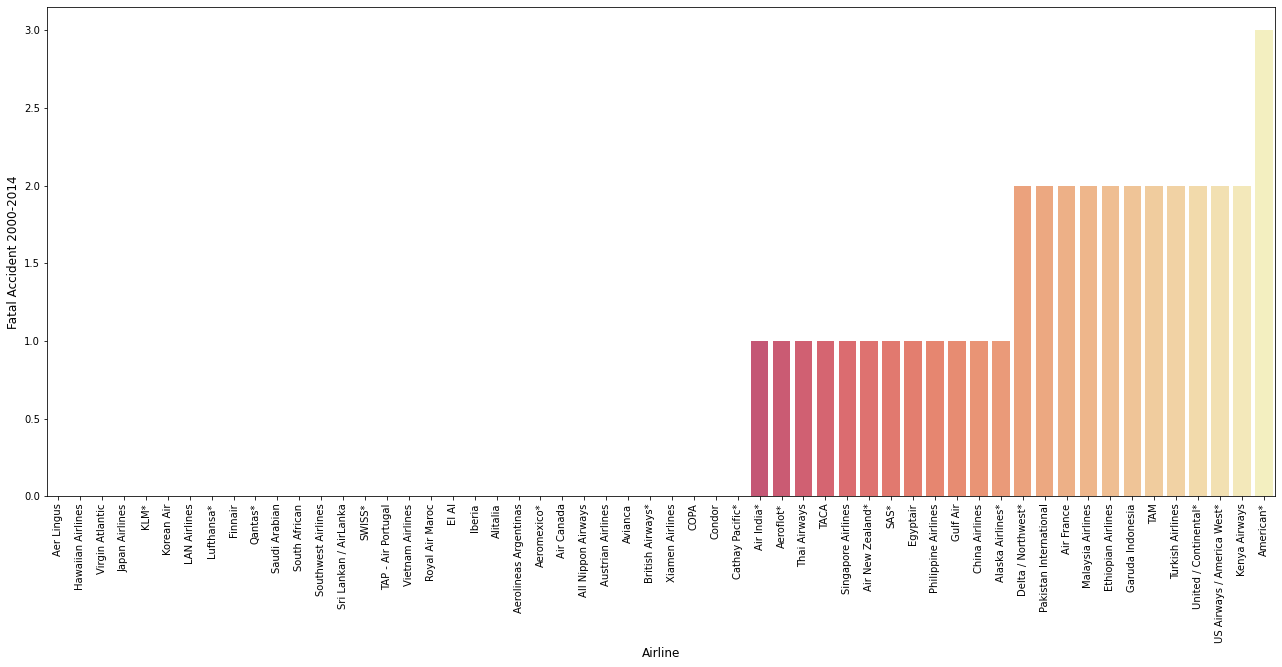

In [23]:
# Barplot of the fatal accidents of each airline (2000-2014)
plt.figure(figsize=(22, 9))
sns.barplot(data=airline_data, y="fatal_accidents_00_14", x="airline", palette='magma', order=airline_data.sort_values(by='fatal_accidents_00_14')['airline'])
plt.xticks(rotation=90)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Fatal Accident 2000-2014', fontsize=12);

In [24]:
# 5 Airlines with very high fatal accidents for the period 2000-2014
airline_data.sort_values(by='fatal_accidents_00_14')['airline'][-5:]

50              Turkish Airlines
51         United / Continental*
52    US Airways / America West*
29                 Kenya Airways
11                     American*
Name: airline, dtype: object

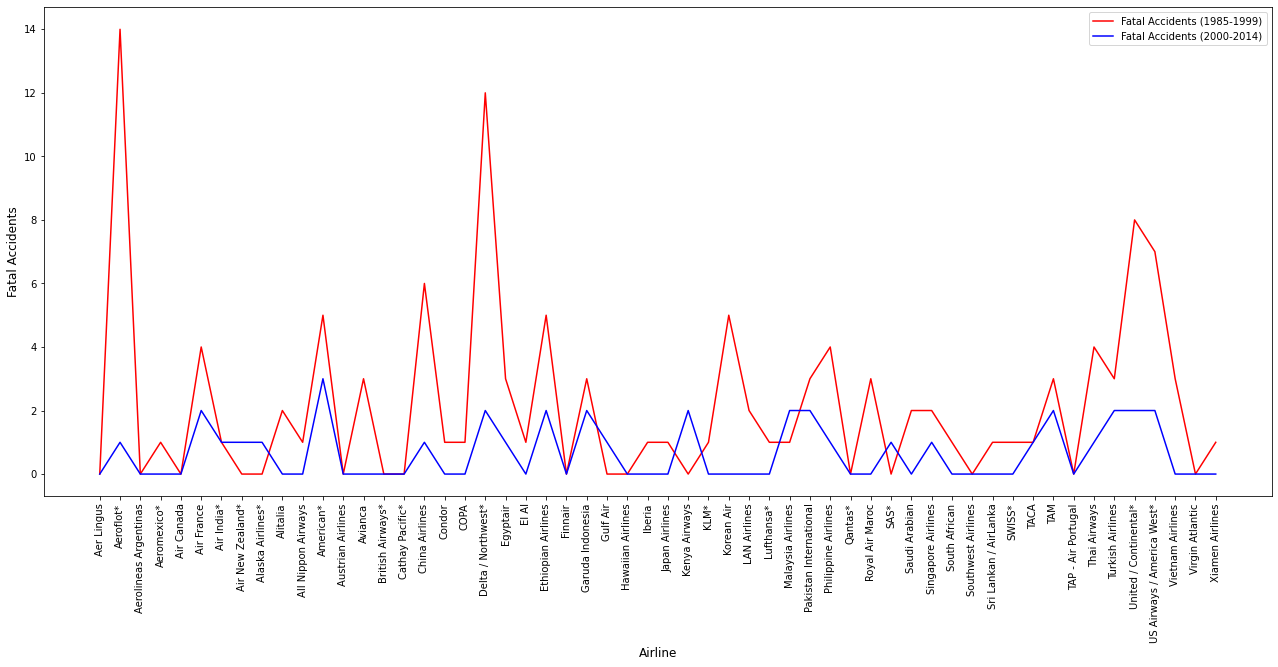

In [25]:
# Lineplots of the number of Fatal Accidents of each airline in the two time intervals
plt.figure(figsize=(22, 9))
sns.lineplot(data=airline_data, x='airline', y='fatal_accidents_85_99', label='Fatal Accidents (1985-1999)', color='red')
sns.lineplot(data=airline_data, x='airline', y='fatal_accidents_00_14', label='Fatal Accidents (2000-2014)', color='blue')
plt.xticks(rotation=90)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Fatal Accidents', fontsize=12);

Overall, we can see a gradual decrease in the total number of fatal accidents reported by airlines in the recent period (2000-2014) compared to the 1985-1999 period.

In [26]:
# Correlation between two time intervals of fatal accidents 
airline_data[['fatal_accidents_85_99', 'fatal_accidents_00_14']].corr()

,fatal_accidents_85_99,fatal_accidents_00_14
fatal_accidents_85_99,1.000000,0.498758
fatal_accidents_00_14,0.498758,1.000000


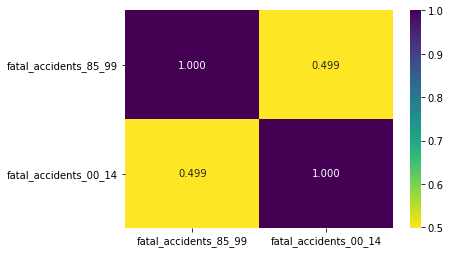

In [27]:
# Heatmap of Correlation between two time intervals of fatal accidents
plt.figure(figsize=(6, 4))
sns.heatmap(data=airline_data[['fatal_accidents_85_99', 'fatal_accidents_00_14']].corr(), annot=True, fmt='.3f', cmap='viridis_r')
plt.yticks(rotation=0);

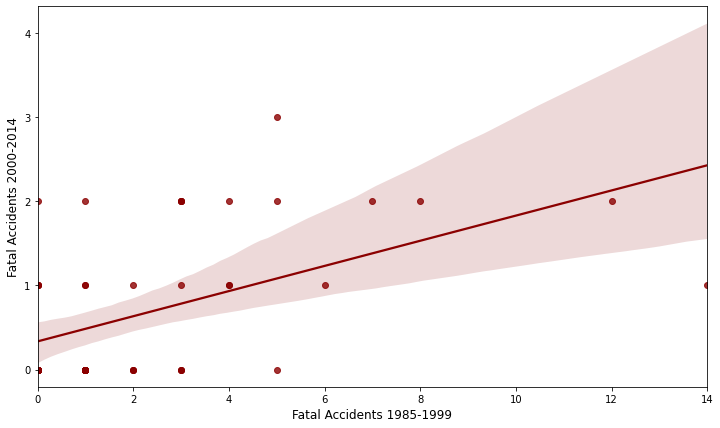

In [28]:
# Scatterplot between the two time intervals of fatal accidents
plt.figure(figsize=(12, 7))
sns.regplot(data=airline_data, x='fatal_accidents_85_99', y='fatal_accidents_00_14', color='darkred')
plt.xlabel('Fatal Accidents 1985-1999', fontsize=12)
plt.ylabel('Fatal Accidents 2000-2014', fontsize=12);

We can a slight positive correlation between the fatal accidents occurred during both the periods.

In [29]:
# Total fatal accidents for both time intervals
print("#Total fatalities (1985-1999) =", airline_data['fatalities_85_99'].sum())
print("#Total fatalities (2000-2014) =", airline_data['fatalities_00_14'].sum())
print("Percentage change in the #fatal accidents: {:.2f}%".format(100*(airline_data['fatalities_00_14'].sum() - airline_data['fatalities_85_99'].sum())/ airline_data['fatalities_85_99'].sum()))

#Total fatalities (1985-1999) = 6295
#Total fatalities (2000-2014) = 3109
Percentage change in the #fatal accidents: -50.61%


From the above figure, we can observe that the **total number of fatalities** has **dropped** by **50.6%** in the recent years i.e. 2000-2014 period compared to the 1985-1999 period.

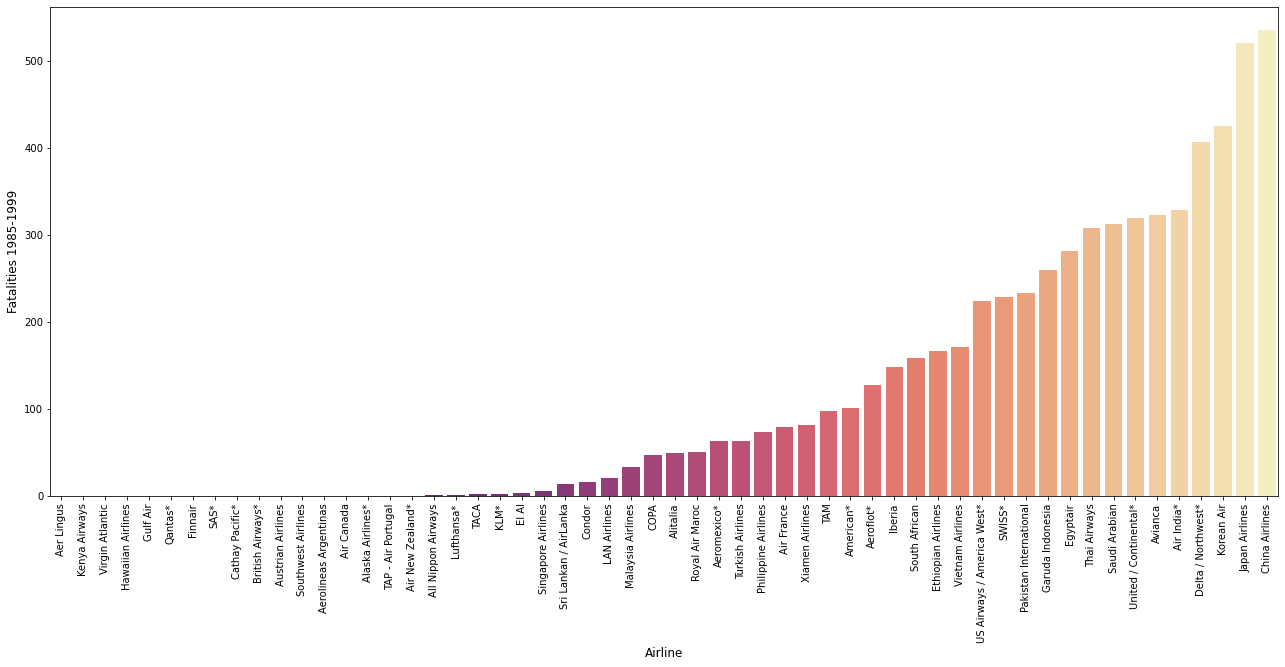

In [30]:
# Barplot of the Fatalities of each airline (1985-1999)
plt.figure(figsize=(22, 9))
sns.barplot(data=airline_data, y="fatalities_85_99", x="airline", palette='magma', order=airline_data.sort_values(by='fatalities_85_99')['airline'])
plt.xticks(rotation=90)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Fatalities 1985-1999', fontsize=12);

In [31]:
# 5 Airlines having very high number of fatalities for the period 1985-1999
airline_data.sort_values(by='fatalities_85_99')['airline'][-5:]

6             Air India*
19    Delta / Northwest*
31            Korean Air
28        Japan Airlines
16        China Airlines
Name: airline, dtype: object

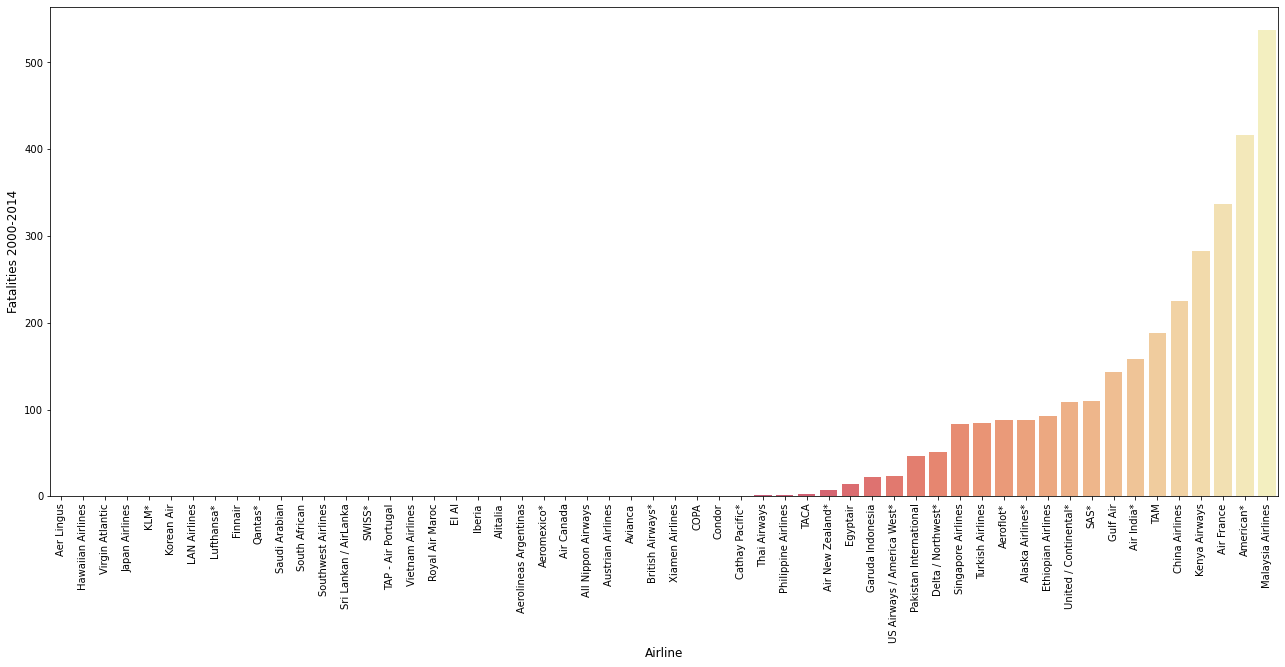

In [32]:
# Barplot of the Fatalities of each airline (2000-2014)
plt.figure(figsize=(22, 9))
sns.barplot(data=airline_data, y="fatalities_00_14", x="airline", palette='magma', order=airline_data.sort_values(by='fatalities_00_14')['airline'])
plt.xticks(rotation=90)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Fatalities 2000-2014', fontsize=12);

In [33]:
# 5 Airlines having very high number of fatalities for the period 2000-2014
airline_data.sort_values(by='fatalities_00_14')['airline'][-5:]

16       China Airlines
29        Kenya Airways
5            Air France
11            American*
34    Malaysia Airlines
Name: airline, dtype: object

From the above data, we can see that Malaysia Airlines is having the highest number of fatalities. Being in the top of the list is no surprise, given the two major accidents in recent years (MH17 was downed over Ukraine and MH370 disappeared, both in 2014).

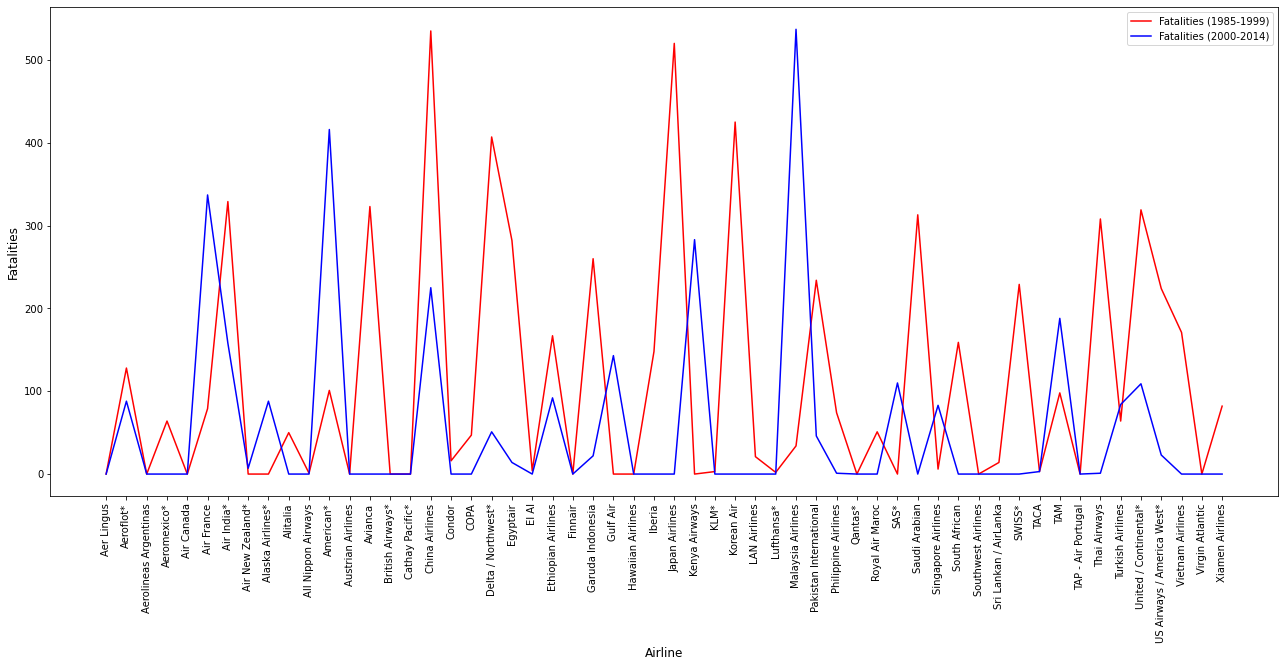

In [34]:
# Lineplots of the number of Fatalities of each airline in the two time intervals
plt.figure(figsize=(22, 9))
sns.lineplot(data=airline_data, x='airline', y='fatalities_85_99', label='Fatalities (1985-1999)', color='red')
sns.lineplot(data=airline_data, x='airline', y='fatalities_00_14', label='Fatalities (2000-2014)', color='blue')
plt.xticks(rotation=90)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Fatalities', fontsize=12);

Overall from the line plots, we can see the decrease in the fatalities.

In [35]:
# Correlation between two time intervals of fatalities 
airline_data[['fatalities_85_99', 'fatalities_00_14']].corr()

,fatalities_85_99,fatalities_00_14
fatalities_85_99,1.000000,0.046979
fatalities_00_14,0.046979,1.000000


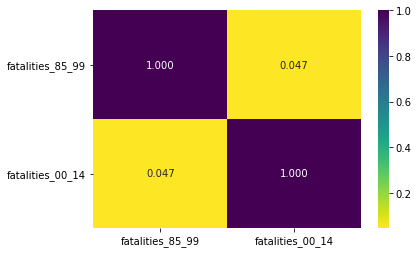

In [36]:
# Heatmap of Correlation between two time intervals of fatalitites
plt.figure(figsize=(6, 4))
sns.heatmap(data=airline_data[['fatalities_85_99', 'fatalities_00_14']].corr(), annot=True, fmt='.3f', cmap='viridis_r')
plt.yticks(rotation=0);

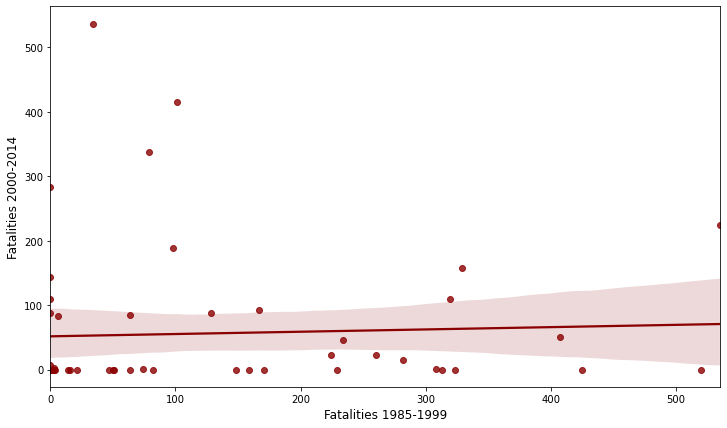

In [37]:
# Scatterplot between the two time intervals of fatalities
plt.figure(figsize=(12, 7))
sns.regplot(data=airline_data, x='fatalities_85_99', y='fatalities_00_14', color='darkred')
plt.xlabel('Fatalities 1985-1999', fontsize=12)
plt.ylabel('Fatalities 2000-2014', fontsize=12);

From the above plot, we clearly see that there is no correlation between the fatalities for the two time periods.

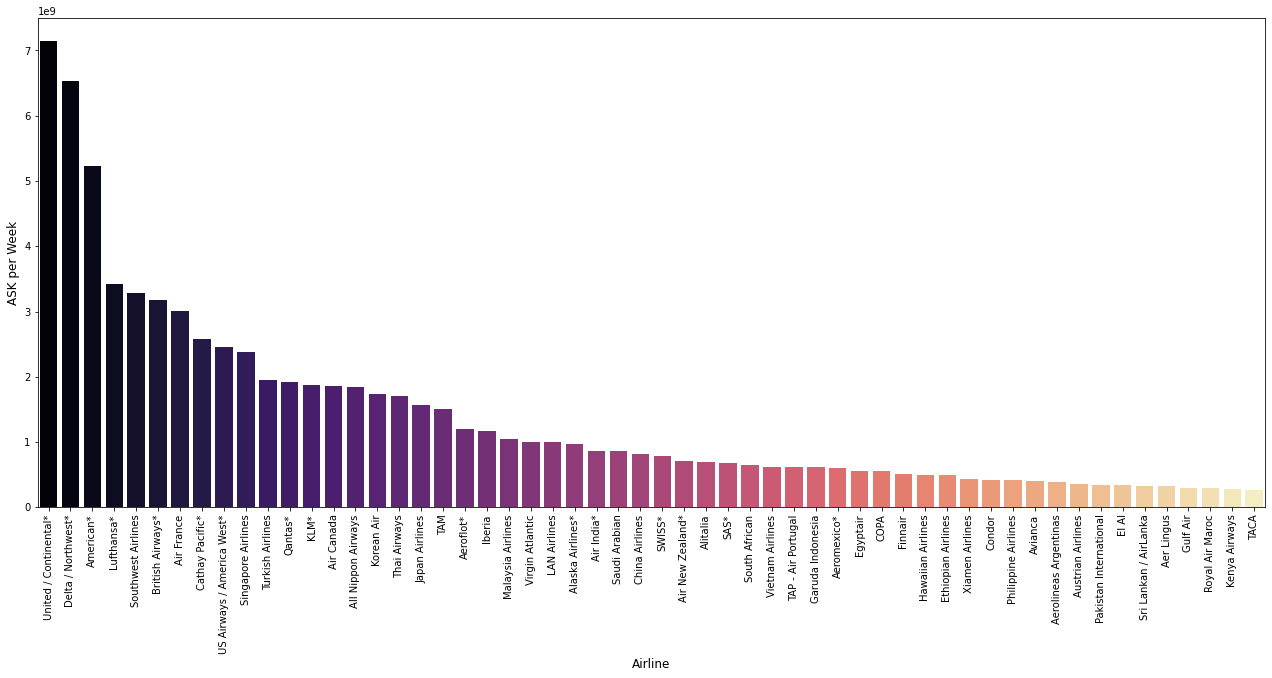

In [38]:
# Barplot of the ASK per week for all the airlines
plt.figure(figsize=(22, 9))
sns.barplot(data=airline_data, y="avail_seat_km_per_week", x="airline", palette='magma', order=airline_data.sort_values(by='avail_seat_km_per_week', ascending=False)['airline'])
plt.xticks(rotation=90)
plt.ylabel("ASK per Week", fontsize=12)
plt.xlabel('Airline', fontsize=12);

In [39]:
# 5 Airline having the very high ASK per week
airline_data.sort_values(by='avail_seat_km_per_week', ascending=False)['airline'][:5]

51    United / Continental*
19       Delta / Northwest*
11                American*
33               Lufthansa*
43       Southwest Airlines
Name: airline, dtype: object

In [40]:
# 5 Airlines having very low ASK per week
airline_data.sort_values(by='avail_seat_km_per_week', ascending=False)['airline'][-5:]

0          Aer Lingus
25           Gulf Air
38    Royal Air Maroc
29      Kenya Airways
46               TACA
Name: airline, dtype: object